In [15]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Melbourne%20Housing%20Snapshot/melb_data.csv")
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [17]:
df[['Rooms', 'Distance', 'Landsize', 'Price']].describe()

,Rooms,Distance,Landsize,Price
count,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,558.416127,1.075684e+06
std,0.955748,5.868725,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,177.000000,6.500000e+05
50%,3.000000,9.200000,440.000000,9.030000e+05
75%,3.000000,13.000000,651.000000,1.330000e+06
max,10.000000,48.100000,433014.000000,9.000000e+06


In [18]:
print('The average of house price nearby CBD: ' )
avg_house_cbd = df[df['Distance'] == df['Distance'].min()][['Price']].mean()
round(avg_house_cbd, 2)

The average of house price nearby CBD: 


Price    671166.67
dtype: float64

In [19]:
print('The most expensive house: ')
df[df['Price'] == df['Price'].max()][['Rooms', 'Price']]

The most expensive house: 


,Rooms,Price
12094,3,9000000.0


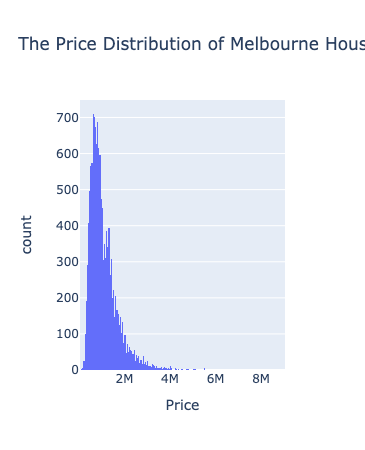

In [20]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.histogram(df, x = 'Price', title='The Price Distribution of Melbourne Housing')
fig.show()

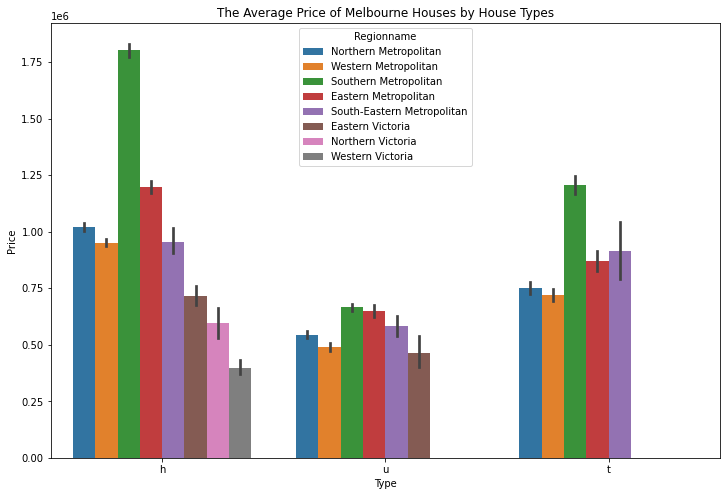

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Type', y='Price', data=df, hue='Regionname', estimator=np.mean)
plt.title('The Average Price of Melbourne Houses by House Types')
plt.show()

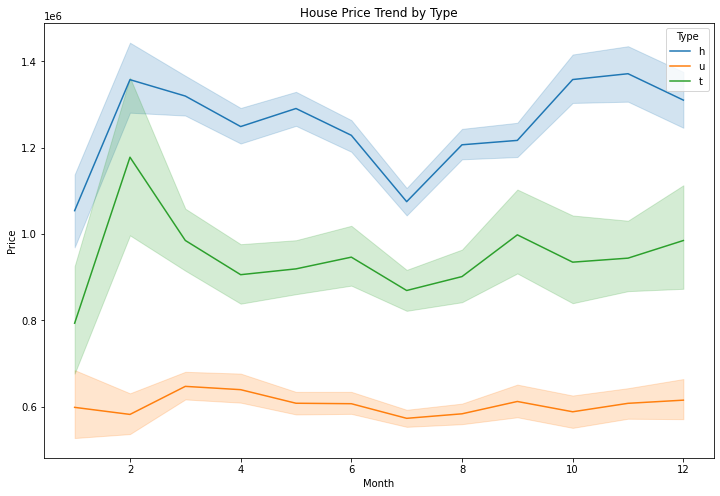

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.DatetimeIndex(df['Date']).month

plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Month', y='Price', hue = 'Type')
plt.title('House Price Trend by Type')
plt.show()

In [23]:
mean_landsize = df['Landsize'].mean()
std_landsize = df['Landsize'].std()

df[df['Landsize'] > (mean_landsize + std_landsize)][['Price']].mean()

Price    880776.666667
dtype: float64

In [24]:
df_sm =  df[df['Regionname'] == 'Southern Metropolitan']
sm_price_range = df_sm['Price'].max() - df_sm['Price'].min()

print(f'The range of house price in the region of Southern Metropolitan: \n{sm_price_range}')

The range of house price in the region of Southern Metropolitan: 
7869000.0


In [25]:
df['Price'] = df['Price'].apply(np.int64)

q1 = df['Price'].describe()['25%']
q3 = df['Price'].describe()['75%']
iqr = q3 - q1

lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
outlier_price = df[(df['Price'] < lower) | (df['Price'] > upper)][['Price']]
print(outlier_price.head(10))

print(f'The total outliers data on the Price column: {len(outlier_price)}')

       Price
80   2850000
92   2615000
97   2575000
102  3010000
103  2800000
108  4735000
112  3755000
118  2800000
124  2840000
233  3625000
The total outliers data on the Price column: 612


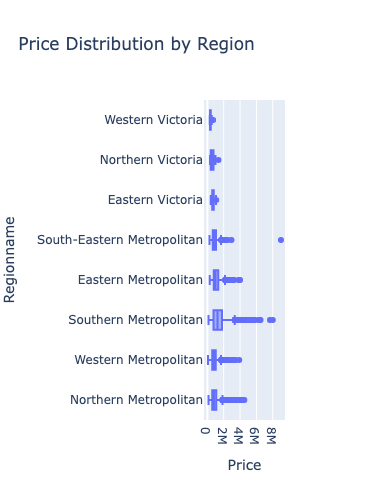

In [26]:
fig = px.box(df, x="Price", y="Regionname", title = 'Price Distribution by Region', width=800, height=500)
fig.show()

In [27]:
df_top_ten = df.sort_values(by='Price', ascending=False).reset_index(drop=True).head(10)
df_top_ten

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Mulgrave,35 Bevis St,3,h,9000000,PI,Hall,2017-07-29,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7
1,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,2017-05-13,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,5
2,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,2017-06-17,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,6
3,Kew,15 Barry St,6,h,6500000,S,Jellis,2016-08-13,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,8
4,Middle Park,136 Page St,5,h,6400000,S,Marshall,2017-09-09,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0,9
5,Toorak,17 Albany Rd,3,h,6250000,S,Kay,2016-10-15,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0,10
6,Brighton,161 Church St,5,h,5800000,PI,Castran,2017-08-04,11.2,3186.0,5.0,4.0,4.0,1276.0,NaN,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0,8
7,South Yarra,18 Avoca St,4,h,5700000,S,Castran,2016-12-11,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0,12
8,Middle Park,204 Page St,6,h,5600000,PI,Marshall,2017-03-06,3.0,3206.0,6.0,4.0,2.0,472.0,328.0,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0,3
9,Armadale,367 Dandenong Rd,6,h,5525000,S,Marshall,2016-09-17,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,9


In [29]:
import folium

melb_map = folium.Map(location = [-37.8136, 144.9631], zoom_start=11)
for i in range(len(df_top_ten['Lattitude'])):
    folium.Marker(df_top_ten[['Lattitude', 'Longtitude']].loc[i].tolist(),
                popup= 'Price: AUD' + str(round(df_top_ten['Price'].loc[i]/1000000, 1))+ 'M',
                tooltip=df_top_ten['Address'].loc[i],
                icon=folium.Icon(color = 'red', icon='info-sign')
                ).add_to(melb_map)
melb_map

In [30]:
from scipy.stats import shapiro

sw_statistics, sw_pvalue = shapiro(df['Price'])

if sw_pvalue < 0.05:
    print(f'P-Value: {sw_pvalue}. So we reject that the data are normal distributed.')
else:
    print(f'P-Value: {sw_pvalue}. So we assume it is a normal distribution.')

P-Value: 0.0. So we reject that the data are normal distributed.


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [31]:
df[['Rooms', 'Price']].corr()

,Rooms,Price
Rooms,1.000000,0.496634
Price,0.496634,1.000000


In [32]:
corr_rooms_Price = df['Rooms'].corr(df['Price'], method= 'pearson')

if 1 >= corr_rooms_Price > 0.9:
    print(f'The corr value: {corr_rooms_Price}. The correlation between Rooms and Price is perfect strong.')
elif 0.9 >= corr_rooms_Price > 0.7:
    print(f'The corr value: {corr_rooms_Price}. The correlation between Rooms and Price is considered positively strong.')
elif 0.7 >= corr_rooms_Price > 0.5:
    print(f'The corr value: {corr_rooms_Price}. The correlation between Rooms and Price is considered moderately strong.')
elif 0.5 >= corr_rooms_Price > 0.3:
    print(f'The corr value: {corr_rooms_Price}. So, Rooms and Price have weak correlations.')
else:
    print(f'The corr value: {corr_rooms_Price}. Between Rooms and Price has weak and negative correlation.')

The corr value: 0.4966336761865308. So, Rooms and Price have weak correlations.


In [33]:
region_list = df['Regionname'].unique()
for i in region_list:
    print(f'{i} = ' + str(df[df['Regionname'] == i]['Rooms'].corr(df[df['Regionname'] == i]['Price'], method='pearson')))

Northern Metropolitan = 0.39281345830224096
Western Metropolitan = 0.4760302938434979
Southern Metropolitan = 0.6837438462796431
Eastern Metropolitan = 0.5029928557468849
South-Eastern Metropolitan = 0.26779944081140455
Eastern Victoria = 0.31442339534695335
Northern Victoria = 0.3611442989081275
Western Victoria = 0.5518865952271457


In [34]:
corr = []
for i in region_list:
    corr.append(df[df['Regionname'] == i]['Rooms'].corr(df[df['Regionname'] == i]['Price'], method = 'pearson'))

pd.DataFrame(data = corr, index = region_list, columns = ['Correlation Price vs Rooms']
            ).sort_values('Correlation Price vs Rooms', ascending=False)

,Correlation Price vs Rooms
Southern Metropolitan,0.683744
Western Victoria,0.551887
Eastern Metropolitan,0.502993
Western Metropolitan,0.476030
Northern Metropolitan,0.392813
Northern Victoria,0.361144
Eastern Victoria,0.314423
South-Eastern Metropolitan,0.267799


In [35]:
corr_Distance_Price = df['Distance'].corr(df['Price'], method='spearman')
print('The correlation between Distance and Price: ' + str(corr_Distance_Price))
print('It defines their correlation is completely negative and weak')

The correlation between Distance and Price: -0.12998984131880323
It defines their correlation is completely negative and weak


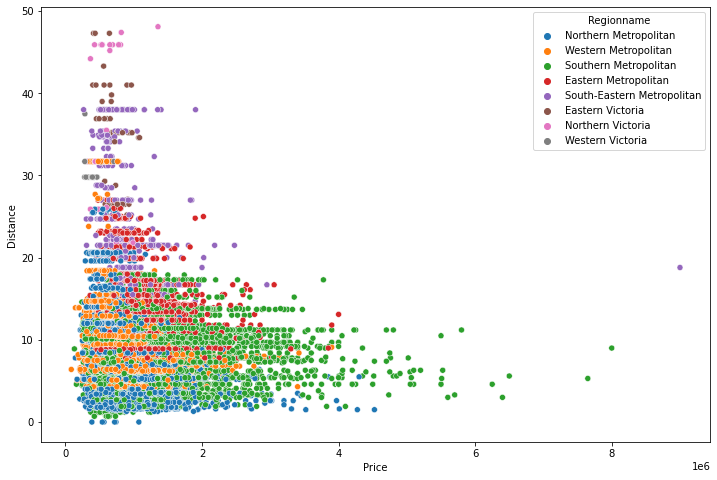

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'Price', y= 'Distance', hue = 'Regionname')
plt.show()

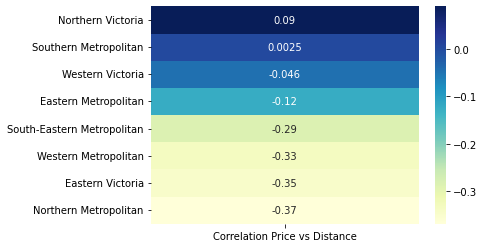

In [37]:
corr =[]
for i in region_list:
    corr.append(df[df['Regionname'] == i]['Distance'].corr(df[df['Regionname'] == i]['Price'], method = 'pearson'))

corr_distance_price = pd.DataFrame(data = corr, index = region_list, columns=['Correlation Price vs Distance']
            ).sort_values('Correlation Price vs Distance', ascending=False)

import seaborn as sns 

ax = sns.heatmap(corr_distance_price, annot=True, cmap="YlGnBu")

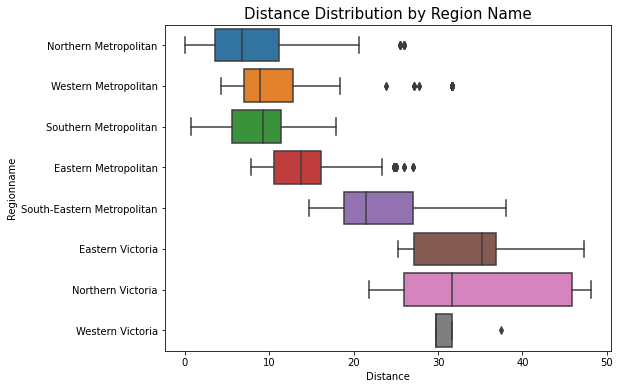

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['Distance'], y=df['Regionname'])
plt.title('Distance Distribution by Region Name', size = 15)
plt.show()

In [39]:
df_ct =  pd.crosstab(df['Type'], df['Method'])
df_ct

Method,PI,S,SA,SP,VB
Type,,,,,
h,1069,6507,66,1079,728
t,134,723,7,143,107
u,361,1792,19,481,364


In [40]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_ct)

if p <= 0.05:
    print(f'P-value: {p}. So we have to refused Ho which means two variables are not independent.')
else:
    print(f'P-value: {p}. So we have to refused Ha which means two variables are not dependent.')

P-value: 3.183702485154384e-22. So we have to refused Ho which means two variables are not independent.


In [41]:
from scipy.stats import f_oneway

f_oneway(df[df['Regionname'] == 'Northern Metropolitan']['Price'],
        df[df['Regionname'] == 'Western Metropolitan']['Price'],
        df[df['Regionname'] == 'Southern Metropolitan']['Price'],
        df[df['Regionname'] == 'Eastern Metropolitan']['Price'],
        df[df['Regionname'] == 'South-Eastern Metropolitan']['Price'],
        df[df['Regionname'] == 'Eastern Victoria']['Price'],
        df[df['Regionname'] == 'Northern Victoria']['Price'],
        df[df['Regionname'] == 'Western Victoria']['Price'],
    )

F_onewayResult(statistic=284.40018651008097, pvalue=0.0)

In [42]:
values =[]
for i in region_list:
    values.append(round(df[df['Regionname'] == i]['Price'].mean(), 2))

pd.DataFrame(data = values, index = region_list, columns= ['Price Mean']
).sort_values(by = 'Price Mean', ascending= False)

,Price Mean
Southern Metropolitan,1372963.37
Eastern Metropolitan,1104079.63
South-Eastern Metropolitan,922943.78
Northern Metropolitan,898171.08
Western Metropolitan,866420.52
Eastern Victoria,699980.79
Northern Victoria,594829.27
Western Victoria,397523.44


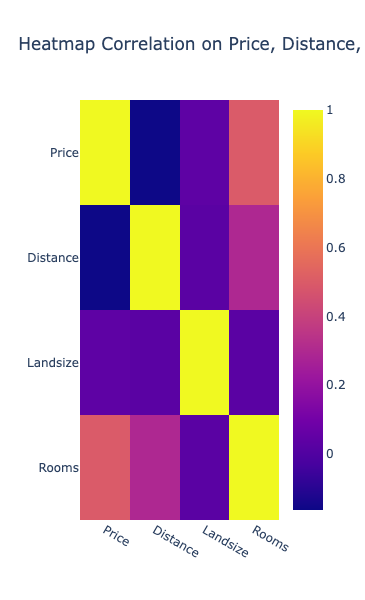

In [43]:
plotly.offline.init_notebook_mode(connected=True)

df_corr = df[['Price', 'Distance', 'Landsize', 'Rooms']].corr()

fig= px.imshow(df_corr, text_auto = True, aspect = 2, title='Heatmap Correlation on Price, Distance, Landsize, and Rooms', width=800, height=600)
fig.show()